# The Pasta Production Problem

This tutorial includes everything you need to set up IBM Decision Optimization CPLEX Modeling for Python (DOcplex), build a Mathematical Programming model, and get its solution by solving the model with IBM ILOG CPLEX Optimizer. 

Table of contents:

-  [Describe the business problem](#Describe-the-business-problem)
*  [How decision optimization (prescriptive analytics) can help](#How--decision-optimization-can-help)
*  [Use decision optimization](#Use-decision-optimization)
    -  [Step 1: Model the data](#Step-1:-Model-the-data)
    *  [Step 2: Prepare the data](#Step-2:-Prepare-the-data)
    -  [Step 3: Set up the prescriptive model](#Step-3:-Set-up-the-prescriptive-model)
        * [Define the decision variables](#Define-the-decision-variables)
        * [Express the business constraints](#Express-the-business-constraints)
        * [Express the objective](#Express-the-objective)
        * [Solve with Decision Optimization](#Solve-with-Decision-Optimization)
    *  [Step 4: Investigate the solution and run an example analysis](#Step-4:-Investigate-the-solution-and-then-run-an-example-analysis)
*  [Summary](#Summary)

****

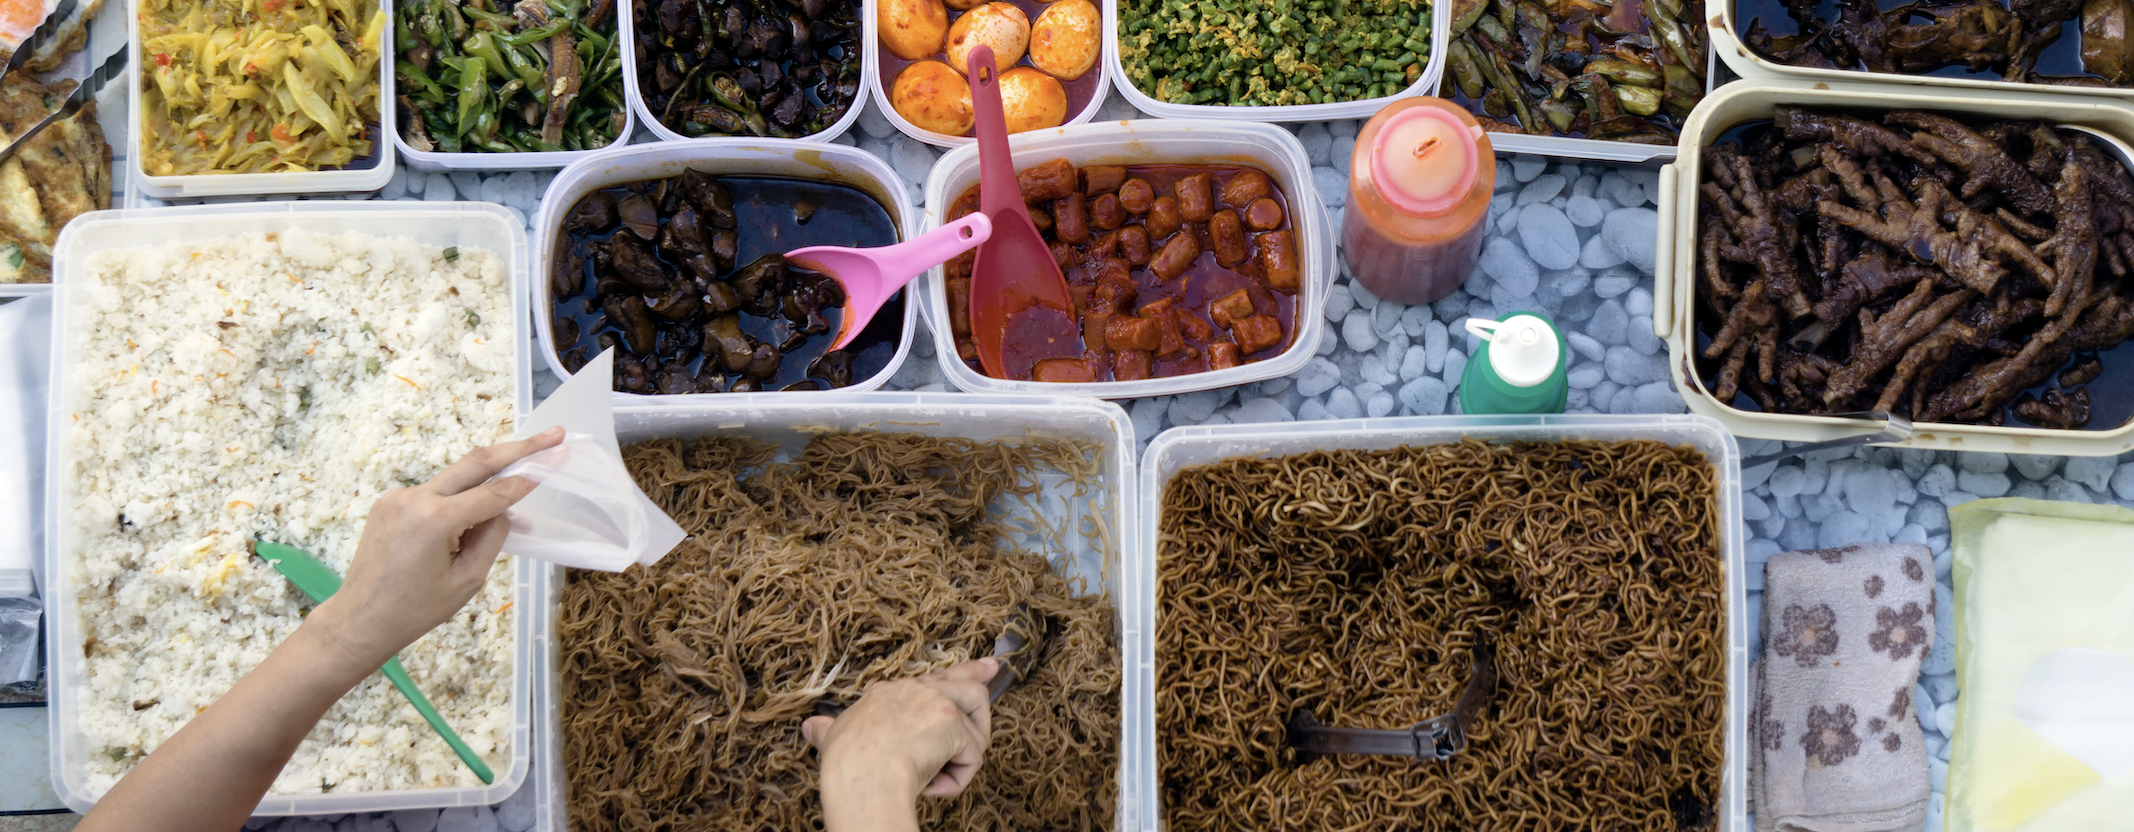

## Describe the business problem

This notebook describes how to use CPLEX Modeling for Python to manage the production of pasta to meet demand with your resources.

The model aims at minimizing the production cost for a number of products while satisfying customer demand.

   * Each product can be produced either inside the company or outside, at a higher cost.
   * The inside production is constrained by the company's resources, while outside production is considered unlimited.

The model first declares the products and the resources.
The data consists of the description of the products (the demand, the inside and outside costs,
and the resource consumption) and the capacity of the various resources.
The variables for this problem are the inside and outside production for each product.

## How  decision optimization can help

* Prescriptive analytics (decision optimization) technology recommends actions that are based on desired outcomes.  It takes into account specific scenarios, resources, and knowledge of past and current events. With this insight, your organization can make better decisions and have greater control of business outcomes.  

* Prescriptive analytics is the next step on the path to insight-based actions. It creates value through synergy with predictive analytics, which analyzes data to predict future outcomes.  

* Prescriptive analytics takes that insight to the next level by suggesting the optimal way to handle that future situation. Organizations that can act fast in dynamic conditions and make superior decisions in uncertain environments gain a strong competitive advantage.  
<br/>

<u>With prescriptive analytics, you can:</u> 

* Automate the complex decisions and trade-offs to better manage your limited resources.
* Take advantage of a future opportunity or mitigate a future risk.
* Proactively update recommendations based on changing events.
* Meet operational goals, increase customer loyalty, prevent threats and fraud, and optimize business processes.

## Use decision optimization

### Step 1: Model the data

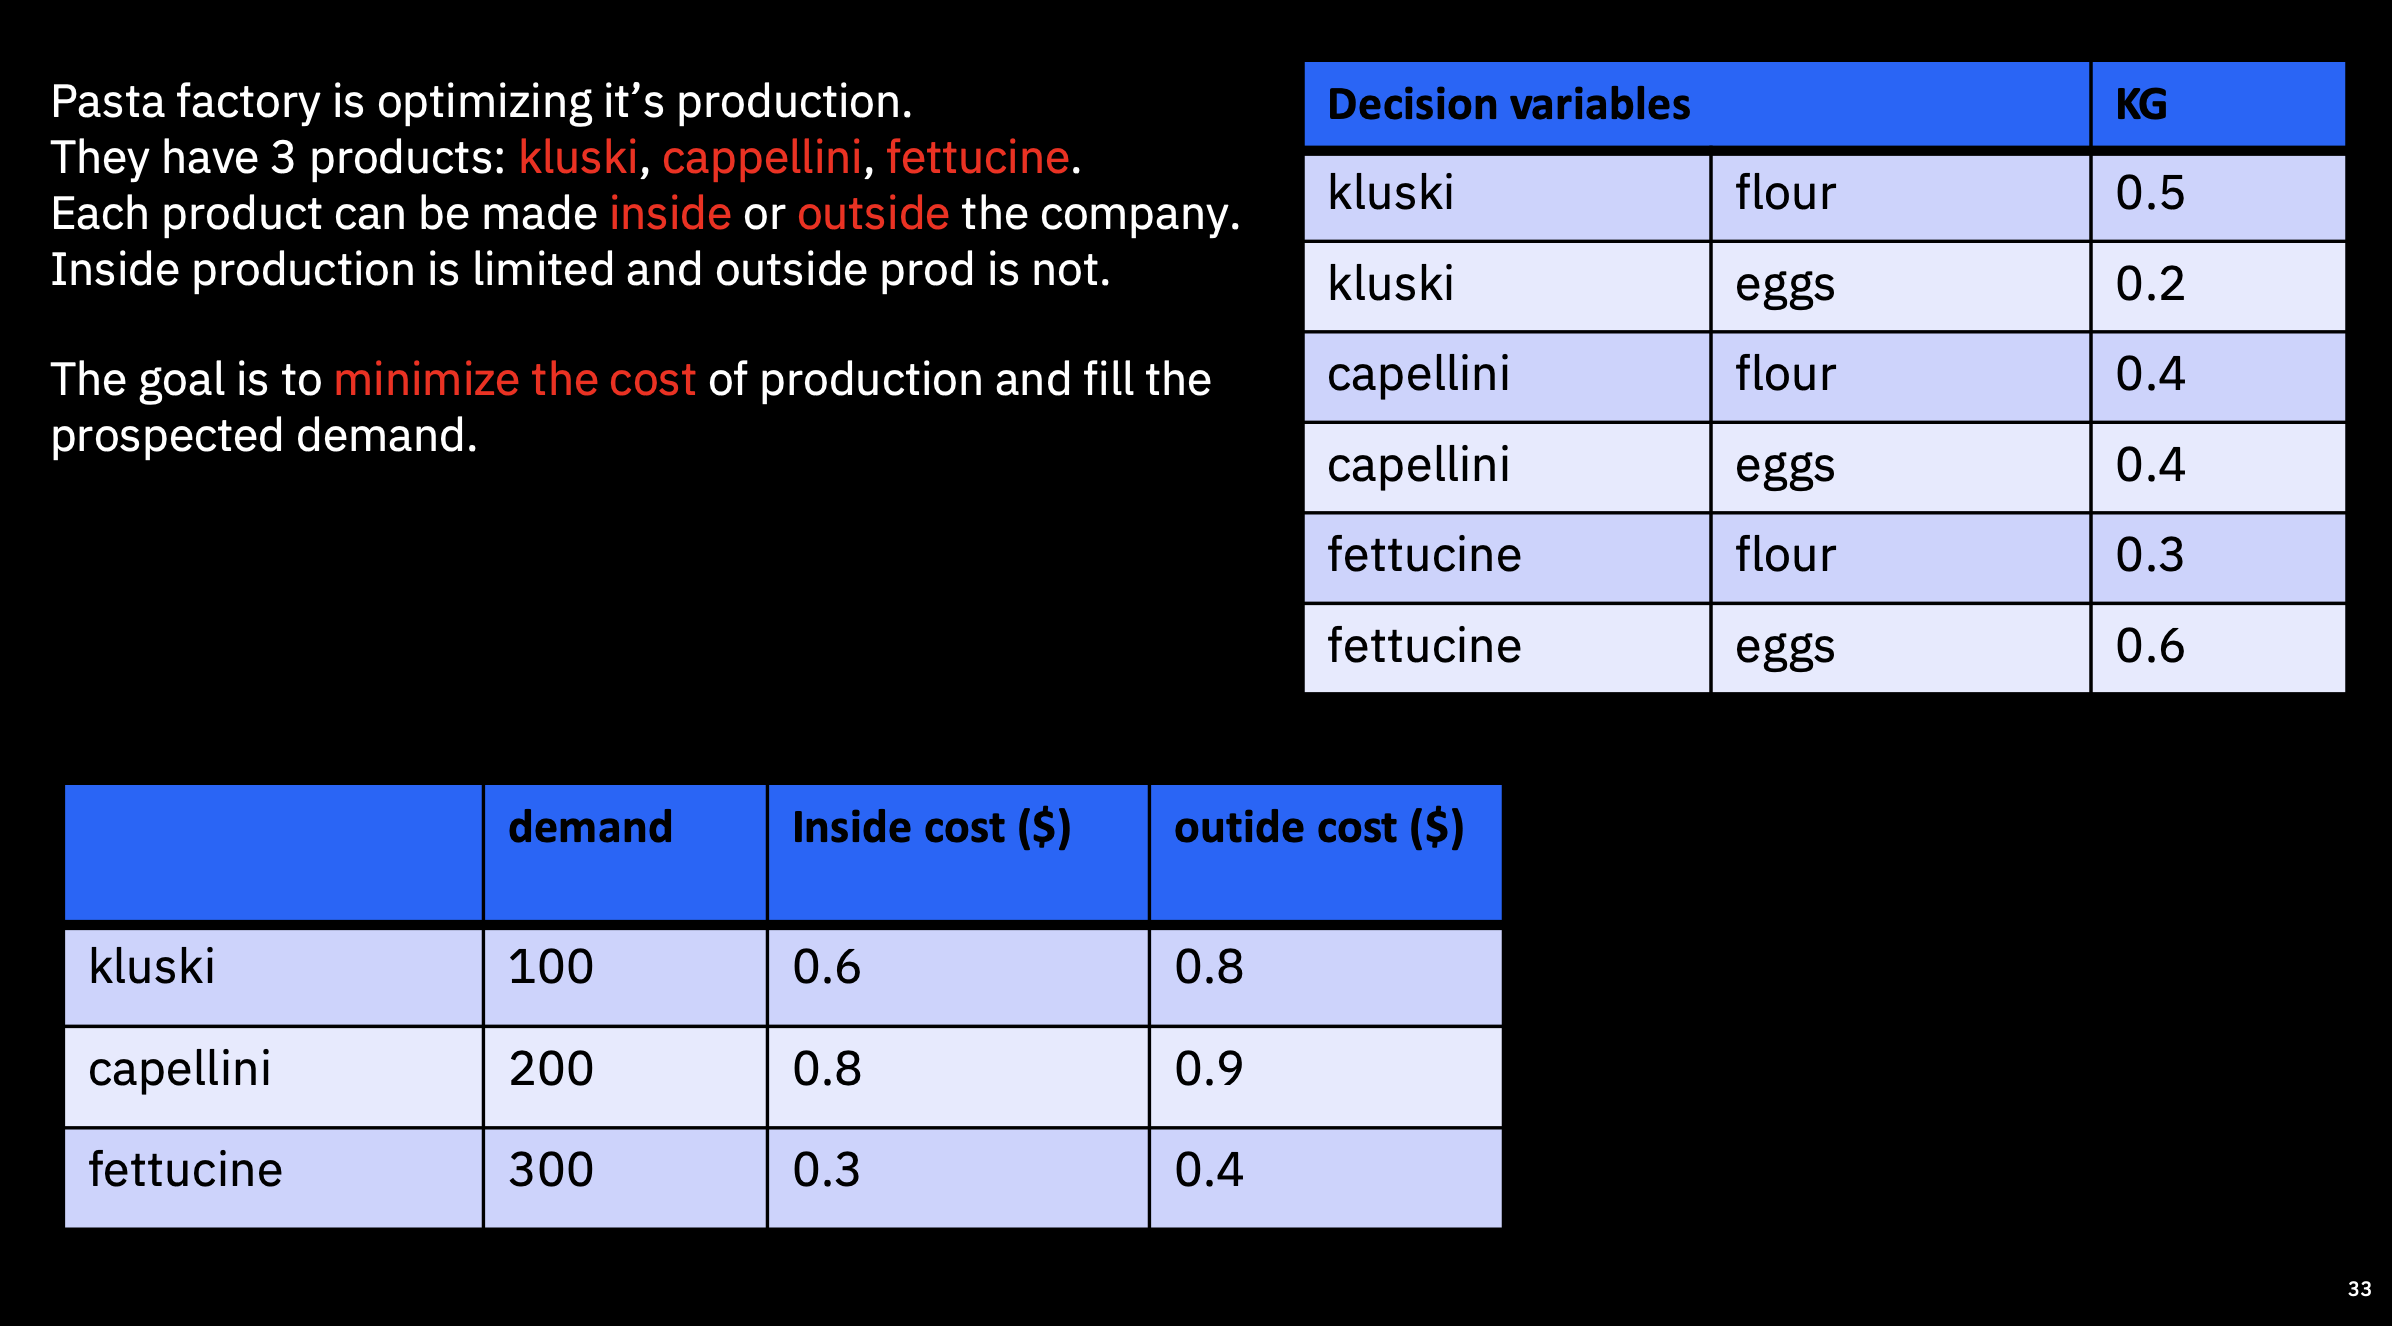

In [1]:
products = [("kluski", 100, 0.6, 0.8),
            ("capellini", 200, 0.8, 0.9),
            ("fettucine", 300, 0.3, 0.4)]

# resources are a list of simple tuples (name, capacity)
resources = [("flour", 20),
             ("eggs", 40)]

consumptions = {("kluski", "flour"): 0.5,
                ("kluski", "eggs"): 0.2,
                ("capellini", "flour"): 0.4,
                ("capellini", "eggs"): 0.4,
                ("fettucine", "flour"): 0.3,
                ("fettucine", "eggs"): 0.6}

### Step 2: Prepare the data

The data used is very simple and is ready to use without any cleaning, massage, refactoring.

### Step 3: Set up the prescriptive model

Set up the prescriptive model using the Mathematical Programming (docplex.mp) modeling package.

In [2]:
from docplex.mp.environment import Environment
env = Environment()
env.print_information()

* system is: Darwin 64bit
* Python version 3.7.4, located at: /opt/anaconda3/bin/python
* docplex is present, version is 2.19.202
* CPLEX library is present, version is 20.1.0.0, located at: /opt/anaconda3/lib/python3.7/site-packages
* pandas is present, version is 0.25.1


#### Create the DOcplex model
The model contains all the business constraints and defines the objective.

We now use CPLEX Modeling for Python to build a Mixed Integer Programming (MIP) model for this problem.

In [3]:
from docplex.mp.model import Model
mdl = Model(name="pasta")

#### Define the decision variables

In [4]:
inside_vars = mdl.continuous_var_dict(products, name='inside')
outside_vars = mdl.continuous_var_dict(products, name='outside')

#### Express the business constraints

   * Each product can be produced either inside the company or outside, at a higher cost.
   * The inside production is constrained by the company's resources, while outside production is considered unlimited.

In [5]:
# --- constraints ---
# demand satisfaction
mdl.add_constraints((inside_vars[prod] + outside_vars[prod] >= prod[1], 'ct_demand_%s' % prod[0]) for prod in products)

# --- resource capacity ---
mdl.add_constraints((mdl.sum(inside_vars[p] * consumptions[p[0], res[0]] for p in products) <= res[1], 'ct_res_%s' % res[0]) for res in resources)

mdl.print_information()

Model: pasta
 - number of variables: 6
   - binary=0, integer=0, continuous=6
 - number of constraints: 5
   - linear=5
 - parameters: defaults
 - objective: none
 - problem type is: LP


#### Express the objective

Minimizing the production cost for a number of products while satisfying customer demand.

In [6]:
total_inside_cost = mdl.sum(inside_vars[p] * p[2] for p in products)
total_outside_cost = mdl.sum(outside_vars[p] * p[3] for p in products)

mdl.minimize(total_inside_cost + total_outside_cost)

#### Solve with Decision Optimization

Now solve the model, using `Model.solve()`. The following cell solves using your local CPLEX (if any, and provided you have added it to your `PYTHONPATH` variable). 


In [7]:
mdl.solve()

docplex.mp.solution.SolveSolution(obj=372,values={inside_kluski_100_0.6_..

### Step 4: Investigate the solution and then run an example analysis

In [8]:
obj = mdl.objective_value

print("* Production model solved with objective: {:g}".format(obj))
print("* Total inside cost=%g" % total_inside_cost.solution_value)
for p in products:
    print("Inside production of {product}: {ins_var}".format(product=p[0], ins_var=inside_vars[p].solution_value))
print("* Total outside cost=%g" % total_outside_cost.solution_value)
for p in products:
    print("Outside production of {product}: {out_var}".format(product=p[0], out_var=outside_vars[p].solution_value))

* Production model solved with objective: 372
* Total inside cost=24
Inside production of kluski: 40.0
Inside production of capellini: 0
Inside production of fettucine: 0
* Total outside cost=348
Outside production of kluski: 60.0
Outside production of capellini: 200.0
Outside production of fettucine: 300.0



## Summary

You have learned how to set up and use IBM Decision Optimization CPLEX Modeling for Python to formulate a Mathematical Programming model and solve it with IBM Decision Optimization.

## References
* <a href="https://rawgit.com/IBMDecisionOptimization/docplex-doc/master/docs/index.html" target="_blank" rel="noopener noreferrer">CPLEX Modeling for Python documentation</a>
* <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/getting-started/welcome-main.html" target="_blank" rel="noopener noreferrer">Watson Studio documentation</a>

<hr>
Copyright © 2017-2019. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>